In [ ]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install gensim

In [2]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import gensim
from gensim import corpora

# Load Harry Potter book texts
book_files = ["Harry Potter 1.txt", "Harry Potter 2.txt", "Harry Potter 3.txt", "Harry Potter 4.txt"]
books = []

for file in book_files:
    with open(file, 'r', encoding='latin-1') as f:
        books.append(f.read().lower())  # Convert to lowercase for uniformity


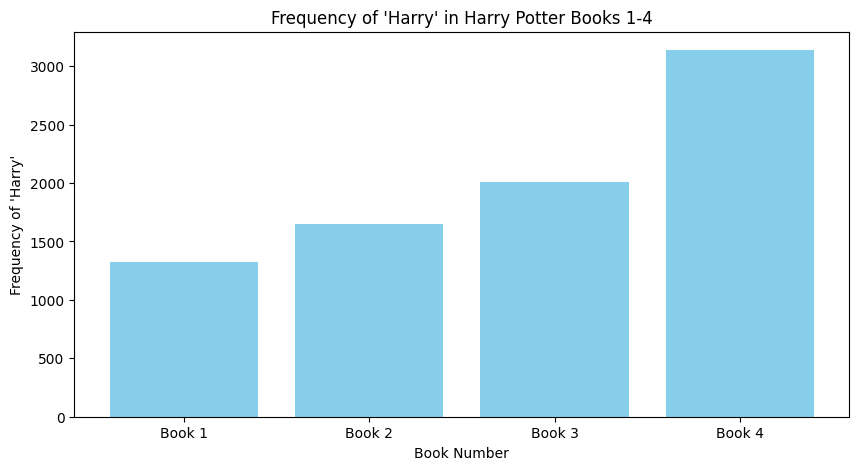

In [3]:
# 1. Word Frequency Analysis

word_counts = [Counter(re.findall(r'\bharry\b', book)) for book in books]
harry_counts = [wc["harry"] for wc in word_counts]

# Plot the frequency of "Harry" in each book
plt.figure(figsize=(10, 5))
plt.bar(range(1, 5), harry_counts, color='skyblue')
plt.xlabel("Book Number")
plt.ylabel("Frequency of 'Harry'")
plt.title("Frequency of 'Harry' in Harry Potter Books 1-4")
plt.xticks(range(1, 5), labels=[f"Book {i}" for i in range(1, 5)])
plt.show()

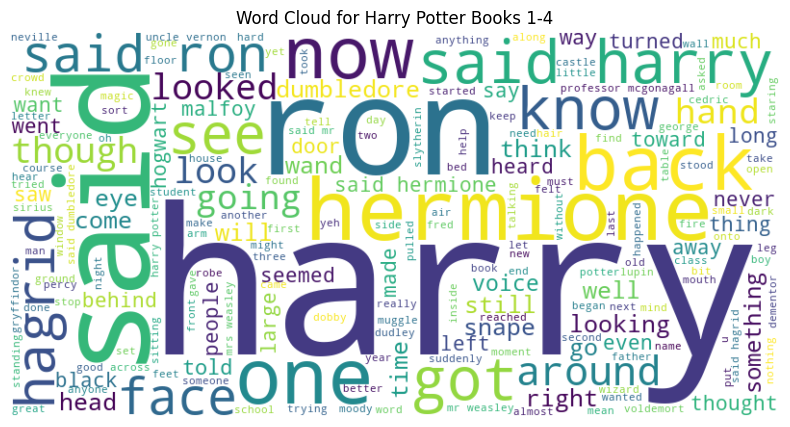

In [4]:
# 2. Generate Word Cloud

full_text = " ".join(books)  # Combine all books into one text
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(full_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Harry Potter Books 1-4")
plt.show()

In [25]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
#3. sentiment analysis
from textblob import TextBlob

text = "Harry Potter was a highly unusual boy in many ways. For one thing, he hated the summer holidays more than any other time of year. For another, he really wanted to do his homework but was forced to do it in secret,in the dead of night. And he also happened to be a wizard."
blob = TextBlob(text)
sentiment = blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

print(f"Sentiment Score: {sentiment}")


Sentiment Score: -0.015625000000000014


In [5]:
# 4. LDA Topic Model
# Preprocessing: Tokenization and stopword removal
stop_words = set(["the", "and", "to", "of", "he", "she", "it", "in", "was", "that", "i", "you", "a", "for", "is", "on"])
texts = [[word for word in re.findall(r'\b\w+\b', book) if word not in stop_words] for book in books]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model with 3 topics
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print the top words for each topic
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.020*"harry" + 0.017*"said" + 0.017*"his" + 0.014*"s" + 0.012*"had" + 0.011*"at" + 0.009*"t" + 0.009*"as" + 0.009*"him" + 0.008*"they"
Topic 2: 0.001*"said" + 0.001*"harry" + 0.001*"his" + 0.001*"s" + 0.001*"as" + 0.001*"at" + 0.001*"t" + 0.001*"ron" + 0.001*"they" + 0.001*"with"
Topic 3: 0.023*"harry" + 0.017*"s" + 0.017*"his" + 0.016*"said" + 0.011*"t" + 0.010*"had" + 0.010*"at" + 0.009*"they" + 0.009*"ron" + 0.008*"as"


In [8]:
import sys
!{sys.executable} -m pip install pyLDAvis
!{sys.executable} -m pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 2.1 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Number of topics: 2, Perplexity: -7.335636441049552
Number of topics: 3, Perplexity: -7.33442557178249
Number of topics: 4, Perplexity: -7.326106342349895
Number of topics: 5, Perplexity: -7.32820414889278
Number of topics: 6, Perplexity: -7.325656748148482
Number of topics: 7, Perplexity: -7.331370977844695
Number of topics: 8, Perplexity: -7.334657003425329
Number of topics: 9, Perplexity: -7.329842569612106
Number of topics: 10, Perplexity: -7.340252122898208


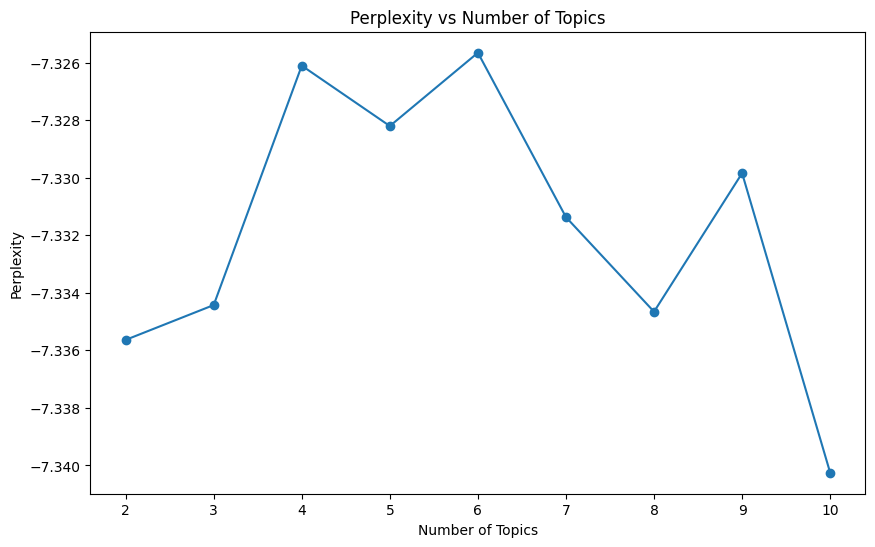

In [ ]:
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Compute Perplexity
def compute_perplexity(corpus, dictionary, num_topics_range):
    perplexities = []  # Initialize an empty list to store perplexities
    for num_topics in num_topics_range:
        # Create LDA model for the current number of topics
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        # Compute the perplexity of the current model
        perplexity = lda_model.log_perplexity(corpus)
        # Append the perplexity value to the list
        perplexities.append(perplexity)
        print(f"Number of topics: {num_topics}, Perplexity: {perplexity}")
    
    return perplexities  # Return the list of perplexities for further use

# Define the range of topics to test
num_topics_range = range(2, 11)

# Call the function and store the perplexities
perplexities = compute_perplexity(corpus, dictionary, num_topics_range)

# Plot Perplexity
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()



Number of topics: 2, Coherence Score: 0.23700133244328403
Number of topics: 3, Coherence Score: 0.247535253279366
Number of topics: 4, Coherence Score: 0.2465542930459803
Number of topics: 5, Coherence Score: 0.244637773279654
Number of topics: 6, Coherence Score: 0.24080143396152046
Number of topics: 7, Coherence Score: 0.24465821291953796
Number of topics: 8, Coherence Score: 0.24398099707108933
Number of topics: 9, Coherence Score: 0.2420624985278813
Number of topics: 10, Coherence Score: 0.23826471445889835


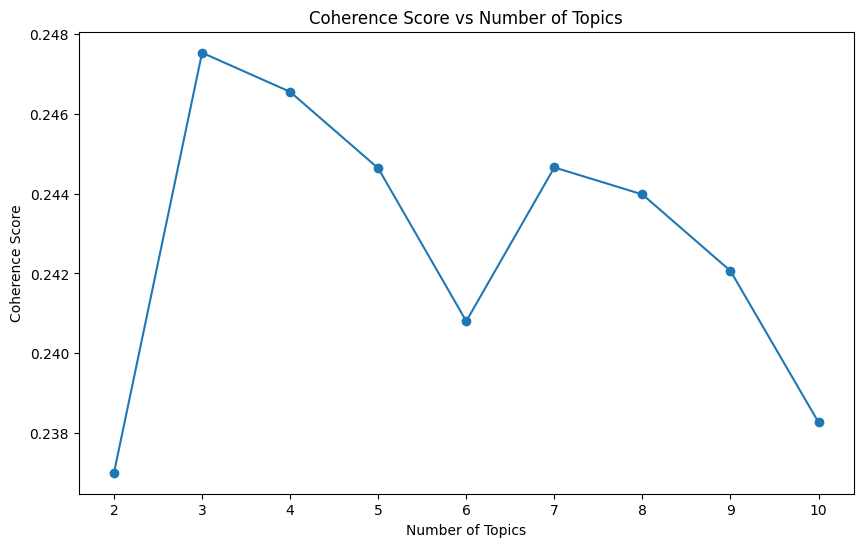

In [14]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Compute Coherence Score
def compute_coherence(corpus, dictionary, texts, num_topics_range):
    coherence_scores = []  # Initialize an empty list to store coherence scores
    for num_topics in num_topics_range:
        # Create LDA model for the current number of topics
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        # Compute the coherence score for the current model
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        # Append the coherence score to the list
        coherence_scores.append(coherence_lda)
        print(f"Number of topics: {num_topics}, Coherence Score: {coherence_lda}")
    
    return coherence_scores  # Return the list of coherence scores for further use

# Define the range of topics to test
num_topics_range = range(2, 11)

# Call the function and store the coherence scores
coherence_scores = compute_coherence(corpus, dictionary, texts, num_topics_range)

# Plot Coherence Scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title('Coherence Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()
